#### Data set URL: https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations

### Data Set Information:

The main idea of this data set is to prepare the algorithm of the expert system, which
will perform the presumptive diagnosis of two diseases of urinary system. It will be
the example of diagnosing of the acute inflammations of urinary bladder and acute
nephritises. For better understanding of the problem let us consider definitions of
both diseases given by medics. Acute inflammation of urinary bladder is characterised
by sudden occurrence of pains in the abdomen region and the urination in form of
constant urine pushing, micturition pains and sometimes lack of urine keeping.
Temperature of the body is rising, however most often not above 38C. The excreted
urine is turbid and sometimes bloody. At proper treatment, symptoms decay usually
within several days. However, there is inclination to returns. At persons with acute
inflammation of urinary bladder, we should expect that the illness will turn into
protracted form.

Acute nephritis of renal pelvis origin occurs considerably more often at women than at
men. It begins with sudden fever, which reaches, and sometimes exceeds 40C. The fever
is accompanied by shivers and one- or both-side lumbar pains, which are sometimes very
strong. Symptoms of acute inflammation of urinary bladder appear very often. Quite not
infrequently there are nausea and vomiting and spread pains of whole abdomen.

The data was created by a medical expert as a data set to test the expert system, which
will perform the presumptive diagnosis of two diseases of urinary system. The basis for
rules detection was Rough Sets Theory. Each instance represents an potential patient.

The data is in an ASCII file. Attributes are separated by TAB.
Each line of the data file starts with a digit which tells the temperature of patient.

### Attribute lines:
For example, '35,9 no no yes yes yes yes no'
Where:
'35,9' Temperature of patient
'no' Occurrence of nausea
'no' Lumbar pain
'yes' Urine pushing (continuous need for urination)
'yes' Micturition pains
'yes' Burning of urethra, itch, swelling of urethra outlet
'yes' decision: Inflammation of urinary bladder
'no' decision: Nephritis of renal pelvis origin


### Attribute Information:

a1 Temperature of patient { 35C-42C }
a2 Occurrence of nausea { yes, no }
a3 Lumbar pain { yes, no }
a4 Urine pushing (continuous need for urination) { yes, no }
a5 Micturition pains { yes, no }
a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }
d1 decision: Inflammation of urinary bladder { yes, no }
d2 decision: Nephritis of renal pelvis origin { yes, no }

In [13]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

#import the data file
diag = pd.read_csv("D:\\Machine Learning\\Data sets\\acute inflammation\\diagnosis.data" ,sep="\t",names = ["temp","nausea","lumbar pain","Urine pusing","Micturition Pains","Burning of urethra","Inflamation of urinary bladder","Nephritis of renal pelvis origin"])

diag.head()

,temp,nausea,lumbar pain,Urine pusing,Micturition Pains,Burning of urethra,Inflamation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [14]:

def convert(ser):
    """used for converting the object data type to float data type"""
    for i in range(0,120):
        ser[i] =  float(str(ser[i]).replace(",", "."))
        #print(ser[i])

convert(diag["temp"])
diag["temp"]= pd.to_numeric(diag["temp"])

diag["temp"].head()




0    35.5
1    35.9
2    35.9
3    36.0
4    36.0
Name: temp, dtype: float64

In [15]:
map_yn = {"yes": 1,"no": 0}

diag.columns

diag["nausea"] = diag["nausea"].map(map_yn)
diag["lumbar pain"] = diag["lumbar pain"].map(map_yn)
diag["Urine pusing"] = diag["Urine pusing"].map(map_yn)
diag["Micturition Pains"] = diag["Micturition Pains"].map(map_yn)
diag["Burning of urethra"] = diag["Burning of urethra"].map(map_yn)
diag["Inflamation of urinary bladder"] = diag["Inflamation of urinary bladder"].map(map_yn)
diag["Nephritis of renal pelvis origin"] = diag["Nephritis of renal pelvis origin"].map(map_yn)

diag.head()


,temp,nausea,lumbar pain,Urine pusing,Micturition Pains,Burning of urethra,Inflamation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


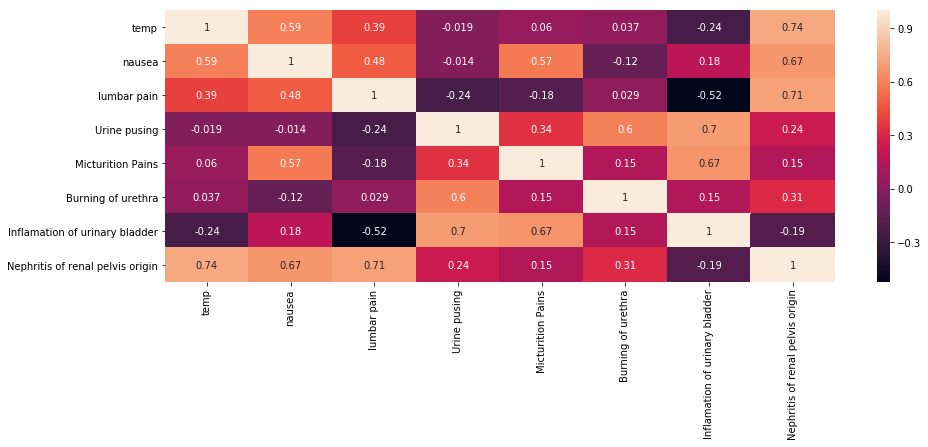

In [16]:
plt.figure(figsize = (15,5))

# calculate correlation matrix to identify linearly dependent variables
corr = diag.corr()
sb.heatmap(corr, annot = True)

In [17]:
# target variable
y = diag["Inflamation of urinary bladder"]

# input matrix
diag.drop(["Inflamation of urinary bladder"],axis = 1,inplace = True)
diag.head()

,temp,nausea,lumbar pain,Urine pusing,Micturition Pains,Burning of urethra,Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0
1,35.9,0,0,1,1,1,0
2,35.9,0,1,0,0,0,0
3,36.0,0,0,1,1,1,0
4,36.0,0,1,0,0,0,0


Logistic regression score :  0.8846153846153846
Decission tree classifier score :  0.8846153846153846
Random forest classifier score :  0.9230769230769231
Naive Bayes classifier score :  0.5
Stochastic gradient descent classifier score :  0.8076923076923077
Support Vector Classifier score :  0.9615384615384616
KNN Classifier score :  0.9615384615384616
################################################################
Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


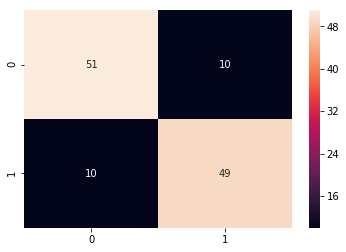

In [41]:
# import libraries from Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


scaler = StandardScaler()


#diag["temp"] = scaler.fit_transform(diag[["temp"]])


train_x, test_x, train_y, test_y = train_test_split(diag,y,test_size= 0.21, random_state = 42)

# define the classifiers
lr = LogisticRegression()
clf = DecisionTreeClassifier(random_state=45)
rf = RandomForestClassifier(n_estimators = 20)
nb = GaussianNB()
sgd = SGDClassifier(loss = "modified_huber", random_state = 45)
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 2)

# scale the training set
train_x = scaler.fit_transform(train_x)

# fit the classifiers
lr.fit(train_x,train_y)
clf.fit(train_x,train_y)
rf.fit(train_x,train_y)
nb.fit(train_x,train_y)
sgd.fit(train_x,train_y)
svc.fit(train_x,train_y)
knn.fit(train_x,train_y)

# print the accuracy scores for each classifier
print("Logistic regression score : ",lr.score(test_x,test_y))
print("Decission tree classifier score : ",clf.score(test_x,test_y))
print("Random forest classifier score : ",rf.score(test_x,test_y))
print("Naive Bayes classifier score : ",nb.score(test_x,test_y))
print("Stochastic gradient descent classifier score : ",sgd.score(test_x,test_y))
print("Support Vector Classifier score : ",svc.score(test_x,test_y))
print("KNN Classifier score : ",knn.score(test_x,test_y))

cnmat = confusion_matrix(y, clf.predict(diag))

print("################################################################")
print("Confusion Matrix")
print(sb.heatmap(cnmat, annot = True))

[Text(133.92000000000002, 190.26, 'X[3] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'), Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'), Text(200.88000000000002, 135.9, 'X[4] <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]'), Text(133.92000000000002, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'), Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'), Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'), Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]')]


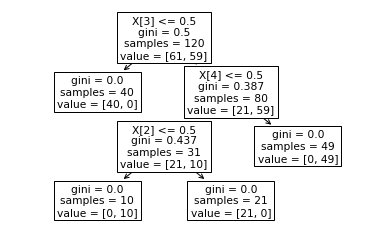

In [40]:
print(tree.plot_tree(clf.fit(diag,y)))


### Summary:
We observe that the top classifiers are KNN, SVC and Random forest. Naive Bayes performs the worst in this case. Although, the performance does affect by modifying the test size of the dataset